# Insurance Claims- Fraud Detection Project

#### Problem Statement: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

#### Build a predictive model that predicts if an insurance claim is fraudulent or not. 

Importing the important libraries for data reading and cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data using the url path.

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'

Loading the data

In [3]:
df=pd.read_csv(url)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Data is loaded

We can see that data has quite a few '?' values as well

In [4]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

21 features are categorical and 19 are numerical. Our target variable is categorical.

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique features and will not have any impact on the machine learning hence we will drop that column

In [7]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [8]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [9]:
df.replace('?',np.NaN,inplace=True)

In [10]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

_c39 has 1000 null values,means there is o data available hence we will drop the same.

In [12]:
df.drop(['_c39'],axis=1,inplace=True)

Lets fill the null values for collision type.

In [13]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

We will use mode method to fill this Nan values.

In [14]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [15]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

Again we will use the mode method to replace the Nan value.

In [16]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [17]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [18]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [19]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

We have clear our dataset from null values.

In [20]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [21]:
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [22]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [23]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [24]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


Observation:
1. Data is from year 1990 to 2015
2. Minimum age of the customer is 19 and max is 64
3. Customer who has claimed insurance is maximum 479 months
4. Minimum claim amount given is 100 and maximum is 114920
5. We have minimum of 1 witnesses and max 3.
6. Vehicl claim is minimum 70 and maximum is 79560

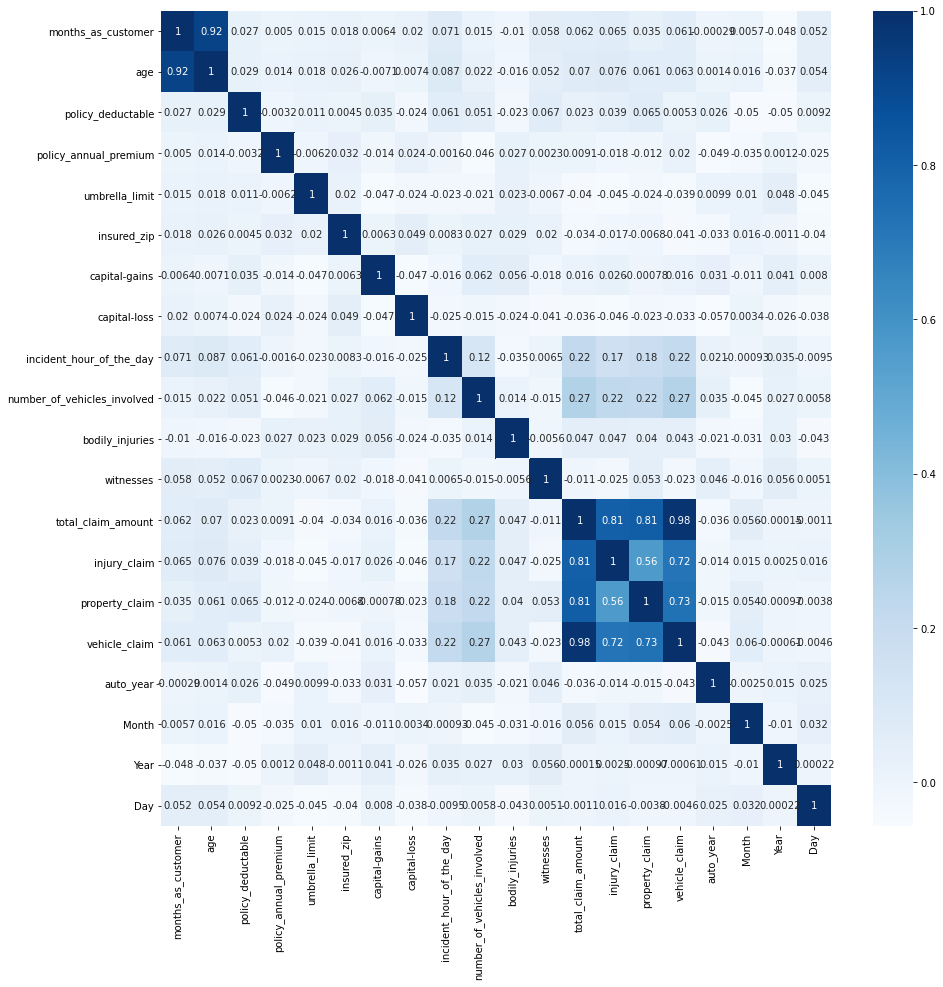

In [26]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other

<AxesSubplot:ylabel='fraud_reported'>

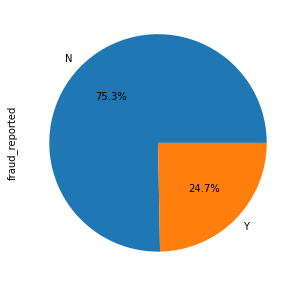

In [27]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 24% of claims were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

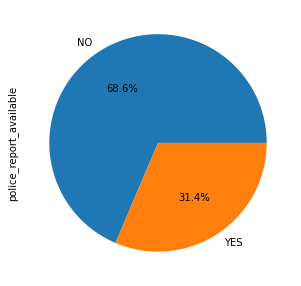

In [28]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

We have 31.4% of the case where Police report is available.

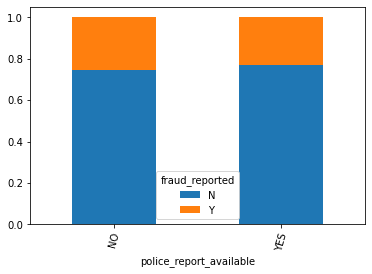

In [29]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There are many cases where police report is not avaiable and it increase the chances of fraud.

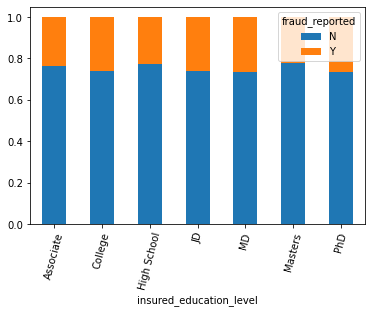

In [30]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There is not much relation between education level and person doing fraud.

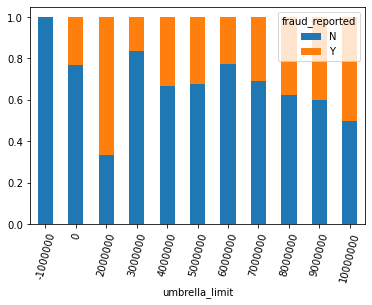

In [31]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having umbrella unit of 2000000 increases the chance of Insurance fraud.

<AxesSubplot:ylabel='insured_sex'>

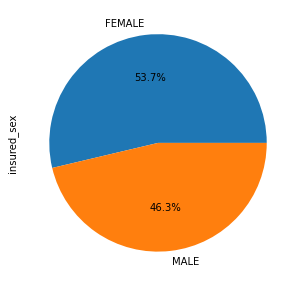

In [32]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

53.7% cases reported for claim are of female

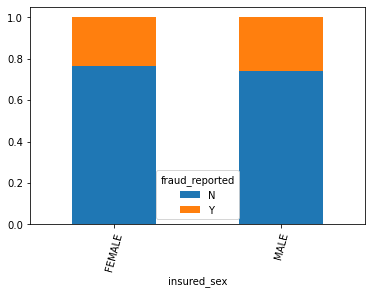

In [33]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Sex has no relation with the Fraud.

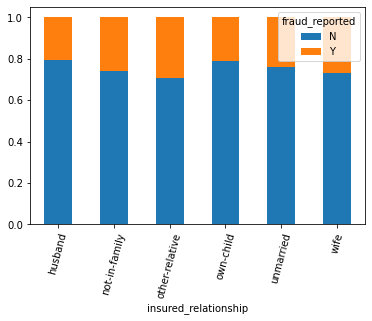

In [34]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Insured relation ship 'other-relative' has higher chance of fraud.

<AxesSubplot:ylabel='insured_hobbies'>

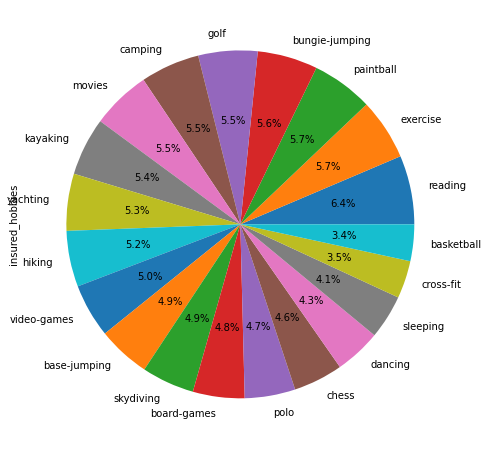

In [35]:
df['insured_hobbies'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Most of the claimers has the reading as hobby while few has basketball.

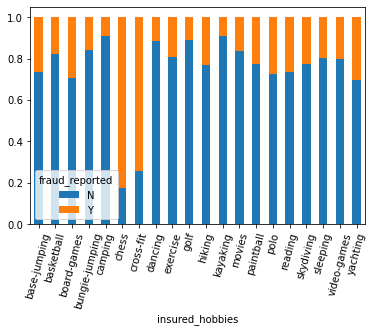

In [36]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

People who has Chess and crossfit as hobbies are most likely that their claim is fraud.

<AxesSubplot:ylabel='incident_type'>

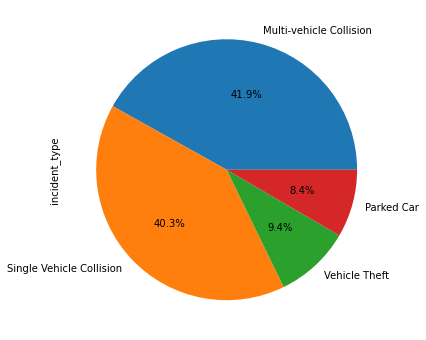

In [37]:
df['incident_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

41.9% and 40.3% of the claims reproted are of Multiple and Single vehicle collission.

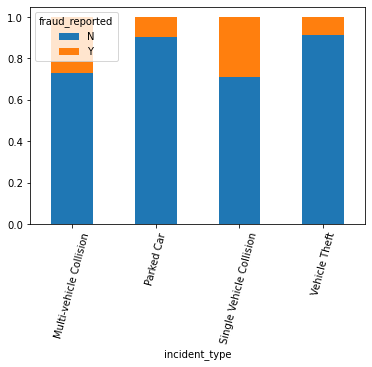

In [38]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Incident type of Parked car and vehicle theft has less chance that the claim is fraud.

<AxesSubplot:ylabel='authorities_contacted'>

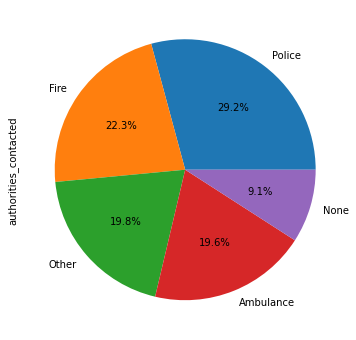

In [39]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

29.2% of the claimers have contacted police. Only 9.1% have contacted no authorities.

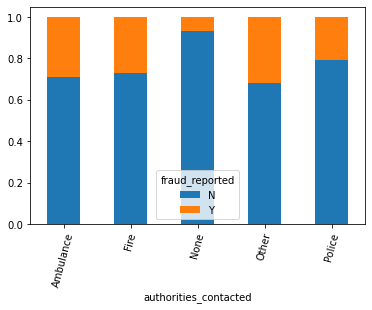

In [40]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of Fraud claim is less if None of the authorities are contacted. It inrease if 'Other' is the category of authorities.

<AxesSubplot:ylabel='witnesses'>

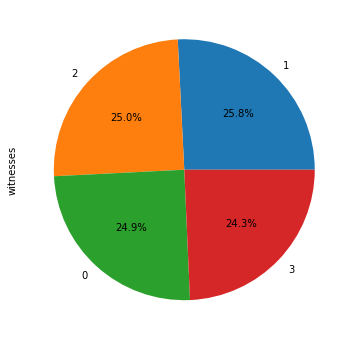

In [41]:
df['witnesses'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Number of witnesses are euqally disributed.

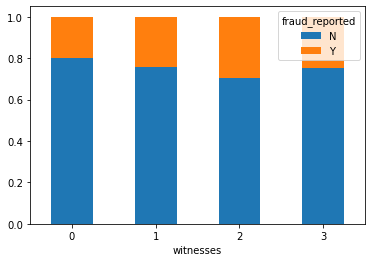

In [42]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

Fraud claim is likely if having 2 witnesses.

<AxesSubplot:ylabel='incident_state'>

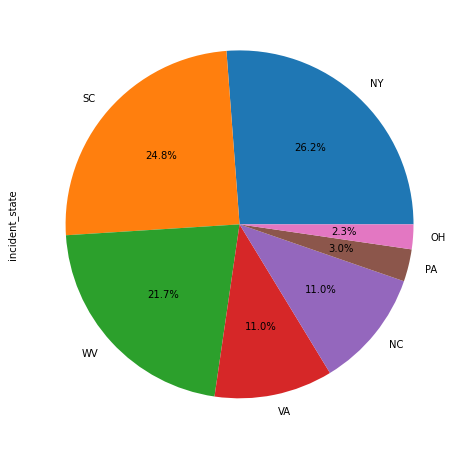

In [43]:
df['incident_state'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from state NY, SC and WV

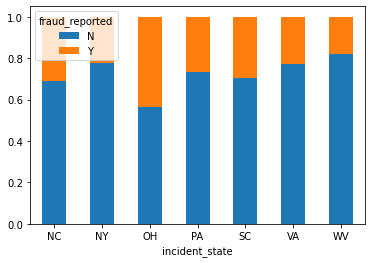

In [44]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

NY and WV have least chance that the claim is fraud.

<AxesSubplot:ylabel='incident_city'>

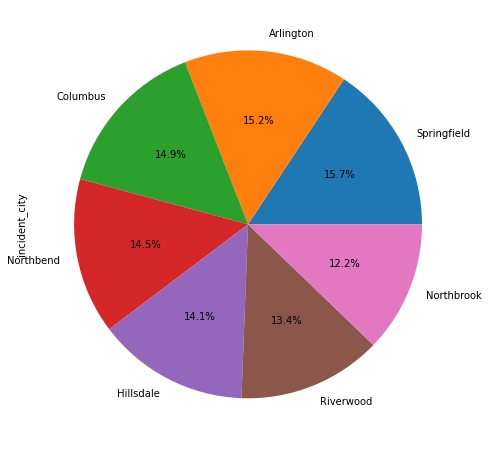

In [45]:
df['incident_city'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Majority of the claims are reported from city Springfiled and Arlington

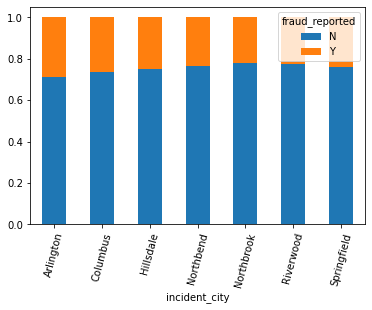

In [46]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chances of fraud claim is likely in city of Arlington and Columbus

<AxesSubplot:ylabel='Month'>

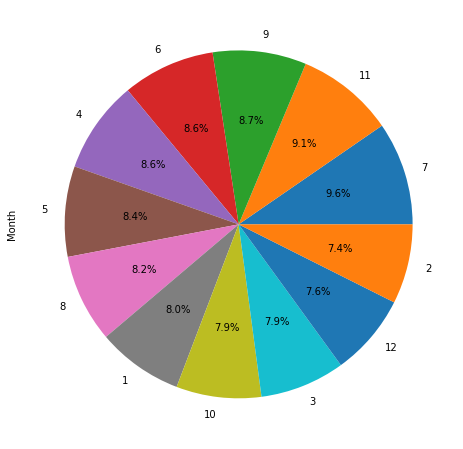

In [47]:
df['Month'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%')

Most of the incidents were reported either in July or Nov.  Least cases are reported in Feb.

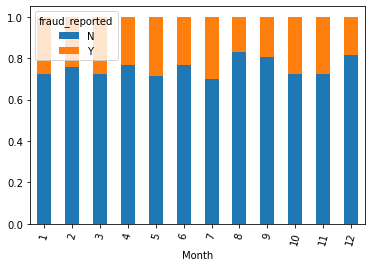

In [48]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

No such strong relation between months and fraud claim. However Dec months is more likely to have less fraud claims.

Lets plot the histogram and see the relations

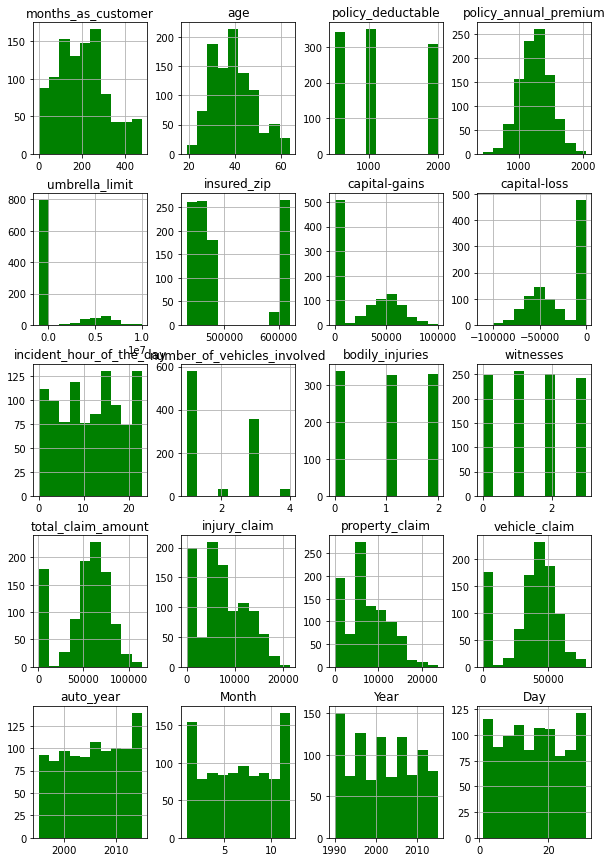

In [49]:
df.hist(figsize=(10,15),color = 'green');

Most of the data is normally distributed.

Let's check for outliers and skewness

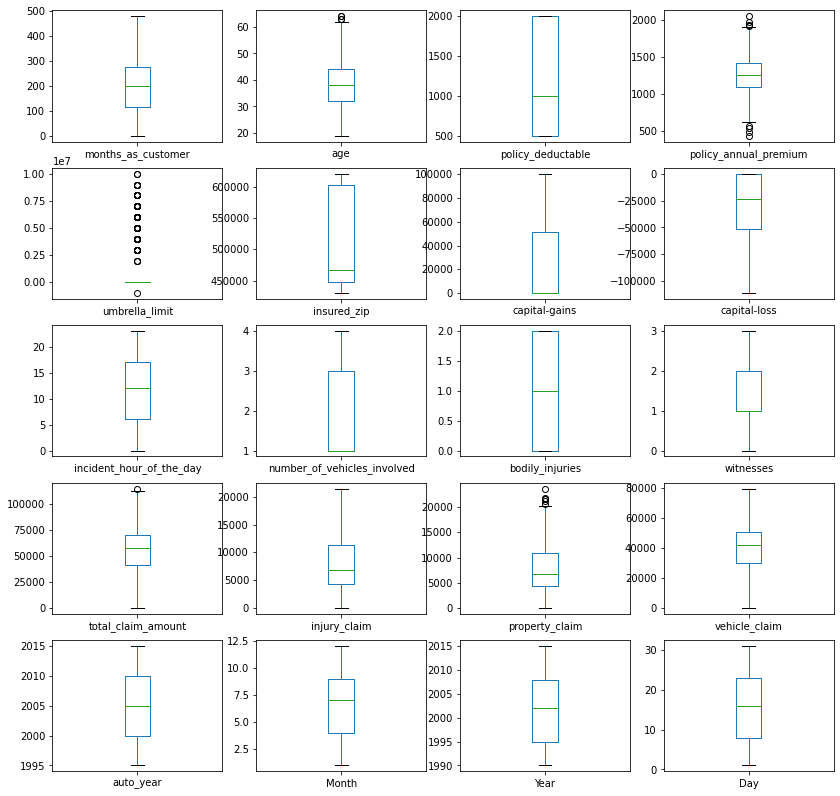

In [50]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

Umbrella limit and property claim has outliers present.

Lets treat the values.

In [51]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


I am replacing the property claim of 23670 with 21810 the second highest value.

In [52]:
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

In [53]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


We will not treat the umbrealla unit as we the data is quite a lot.

Let's check for skewness.

In [54]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

In [55]:
columns=['umbrella_limit','insured_zip']

In [56]:
for i in columns:
    df[i]=np.cbrt(df[i])

In [57]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

Several method were used to reduce the skew but it was not working. Some methods were increasing the skew in total claim amount and vehicle claim.

We will now convert the categorical feature to nummerical using label encoder.

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

Since or data is imbalance we will now balance it using Oversampling from SMOTE.

But before that we will split the data into input and target variable.


In [61]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

In [62]:
x.shape,y.shape

((1000, 38), (1000, 1))

Importing the SMOTE library.

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

In [65]:
x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

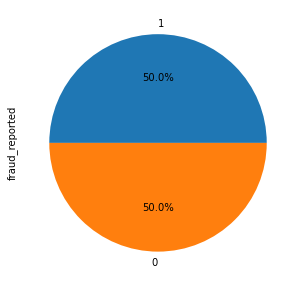

In [66]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

From above we can observe that now our target variable is now balanced.

We will bring our data to the standard scale using Standard Scaler.

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [68]:
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.103737,1.038568,1.347537,0.242174,-0.259475,0.680018,-0.574968,-0.504053,1.286890,0.635745,...,0.660629,-0.263886,1.127916,0.694805,0.968649,-1.734100,-0.169717,1.164380,1.823408,0.162235
1,0.192817,0.351009,0.089390,0.242174,1.438532,-0.227535,1.897740,-0.470853,1.286890,0.635745,...,-2.084766,-1.509274,-1.533638,-2.108020,0.444566,-0.687537,0.356919,-0.095359,0.667297,1.360501
2,-0.663447,-1.138704,1.347537,-1.065043,1.438532,0.706982,1.897740,-1.096837,-0.777067,1.715150,...,-0.864316,-0.005245,-0.866075,-0.977542,-0.603600,1.025020,0.356919,-0.095359,-0.199786,-0.796377
3,0.447875,0.236415,-1.168757,0.242174,1.438532,0.718235,2.052676,1.604159,-0.777067,1.715150,...,0.321890,-0.300835,-0.324631,0.616324,-0.865642,1.405588,1.585738,-0.410293,-1.644925,1.120847
4,0.192817,0.580195,-1.168757,1.549390,-0.259475,1.446087,2.052676,1.639383,1.286890,-1.523064,...,-2.025766,-1.396255,-1.561906,-2.048005,-1.651767,1.120162,0.708010,-0.095359,1.823408,-1.155857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.976209,0.809382,-1.168757,0.242174,-0.259475,0.994700,-0.574968,-0.421541,-0.777067,0.096043,...,-2.102178,-1.495147,-1.519504,-2.139875,-0.865642,0.834736,0.883556,0.534511,0.233756,1.240674
1502,-0.262643,-0.336551,-1.168757,0.242174,0.611603,-0.719773,0.702703,0.327659,-0.777067,-0.443660,...,-0.635615,-0.351911,-0.776704,-0.589347,-0.341559,-1.638958,-0.345263,-0.095359,0.667297,-0.556724
1503,-0.754539,-0.680331,0.089390,0.242174,-1.108478,-1.058503,-0.574968,0.073316,-0.777067,1.175447,...,0.583928,-0.300617,2.189711,0.315498,0.706607,0.359026,-0.871900,0.849445,-0.344300,-0.077418
1504,-1.228218,-1.253297,-1.168757,0.242174,0.446896,0.217097,-0.574968,-0.556881,-0.777067,-0.983362,...,-0.174955,0.553549,-0.108706,-0.362732,-0.603600,0.073599,0.005828,-1.355097,-0.777842,0.282062


##### From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

Importing the libraries for PCA.

In [69]:
from sklearn.decomposition import PCA

In [70]:
testPCA=PCA()
Y=testPCA.fit(sc_x)

Checking the cumulative sum of the expalined variance ratio.

In [71]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.18048464,  15.50994427,  20.09207116,  24.46328344,
        27.99841761,  31.40638761,  34.65290021,  37.83244579,
        40.90876401,  43.9246444 ,  46.91426276,  49.7698292 ,
        52.58915387,  55.35028761,  58.04382877,  60.66982148,
        63.25021986,  65.75689852,  68.23205315,  70.63531823,
        73.02338248,  75.38415481,  77.69340167,  79.94031033,
        82.13086868,  84.30207241,  86.36282318,  88.3442165 ,
        90.31315086,  92.23244853,  94.12161779,  95.96136756,
        97.64378468,  98.80334933,  99.43271122,  99.8188057 ,
        99.99999375, 100.        ])

The above variance shows the number of components against the data we will get. We take 32 components with 95.96% variance ratio

In [72]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

In [73]:
finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.202609,0.904093,2.024769,2.770961,2.641632,0.018447,0.702348,0.874743,0.816120,-0.867535,...,-0.549240,0.934840,0.810247,-0.763806,0.631781,0.924184,0.871216,1.518662,-0.725928,-0.976292
1,-4.207685,0.799803,0.065407,-0.575043,0.514439,-0.820994,0.242565,-0.713185,-0.376730,-1.348836,...,0.642400,1.824808,0.337203,0.161231,-0.500180,-0.301098,0.890003,-0.105122,1.108581,-0.967979
2,-1.079897,-1.033512,-1.652872,-0.394229,-1.711864,1.296360,0.343086,-0.329910,1.028018,-0.453102,...,-0.652837,1.051426,-1.315399,0.343774,0.672492,-0.817944,-0.522681,0.793393,0.837329,1.349292
3,0.099952,1.641143,-0.253317,-2.782051,-2.850491,0.469456,2.168419,0.978258,1.689551,-1.487454,...,0.216763,-0.252220,0.203161,-2.149654,-0.128459,0.480842,-0.687881,0.326259,-0.805185,0.611789
4,-3.541881,1.730569,-0.680764,-1.503692,-1.625101,1.030232,-2.719576,-0.359830,2.136513,0.020045,...,-0.392319,-0.267184,0.514424,-0.804065,-2.942676,1.434093,1.267373,-0.339686,-1.104193,-0.188428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-4.007423,1.712373,-0.139872,-1.340573,-0.193321,0.220115,0.810943,-0.920976,0.872211,-0.215292,...,0.164828,-1.658855,-1.094497,-0.464384,-0.300879,0.101938,0.748961,0.812055,-0.450426,0.514362
1502,0.034005,-1.144490,-2.375185,-1.675272,1.215955,-0.531494,-0.101178,-0.128996,-0.200692,0.029862,...,0.511510,-0.150503,-0.116950,0.963965,-0.202358,1.155338,0.136874,0.200652,0.069763,-1.117703
1503,1.163519,-1.261178,1.302378,-0.785497,1.304452,0.733153,-0.284090,-1.719665,-0.511960,0.697808,...,0.530478,0.023304,-0.220932,-0.159367,-0.201783,-0.925061,1.012319,-0.098979,0.285902,0.119431
1504,0.241620,-2.335666,-0.871922,-1.210506,0.512562,0.427039,0.911297,0.111306,0.113869,0.184665,...,0.132735,-0.452670,-0.219125,0.914061,0.525710,0.262021,0.191512,0.472586,0.293681,-0.262844


This is our final dataset after the PCA. I will reassign x to finalx

In [74]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.202609,0.904093,2.024769,2.770961,2.641632,0.018447,0.702348,0.874743,0.816120,-0.867535,...,-0.549240,0.934840,0.810247,-0.763806,0.631781,0.924184,0.871216,1.518662,-0.725928,-0.976292
1,-4.207685,0.799803,0.065407,-0.575043,0.514439,-0.820994,0.242565,-0.713185,-0.376730,-1.348836,...,0.642400,1.824808,0.337203,0.161231,-0.500180,-0.301098,0.890003,-0.105122,1.108581,-0.967979
2,-1.079897,-1.033512,-1.652872,-0.394229,-1.711864,1.296360,0.343086,-0.329910,1.028018,-0.453102,...,-0.652837,1.051426,-1.315399,0.343774,0.672492,-0.817944,-0.522681,0.793393,0.837329,1.349292
3,0.099952,1.641143,-0.253317,-2.782051,-2.850491,0.469456,2.168419,0.978258,1.689551,-1.487454,...,0.216763,-0.252220,0.203161,-2.149654,-0.128459,0.480842,-0.687881,0.326259,-0.805185,0.611789
4,-3.541881,1.730569,-0.680764,-1.503692,-1.625101,1.030232,-2.719576,-0.359830,2.136513,0.020045,...,-0.392319,-0.267184,0.514424,-0.804065,-2.942676,1.434093,1.267373,-0.339686,-1.104193,-0.188428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-4.007423,1.712373,-0.139872,-1.340573,-0.193321,0.220115,0.810943,-0.920976,0.872211,-0.215292,...,0.164828,-1.658855,-1.094497,-0.464384,-0.300879,0.101938,0.748961,0.812055,-0.450426,0.514362
1502,0.034005,-1.144490,-2.375185,-1.675272,1.215955,-0.531494,-0.101178,-0.128996,-0.200692,0.029862,...,0.511510,-0.150503,-0.116950,0.963965,-0.202358,1.155338,0.136874,0.200652,0.069763,-1.117703
1503,1.163519,-1.261178,1.302378,-0.785497,1.304452,0.733153,-0.284090,-1.719665,-0.511960,0.697808,...,0.530478,0.023304,-0.220932,-0.159367,-0.201783,-0.925061,1.012319,-0.098979,0.285902,0.119431
1504,0.241620,-2.335666,-0.871922,-1.210506,0.512562,0.427039,0.911297,0.111306,0.113869,0.184665,...,0.132735,-0.452670,-0.219125,0.914061,0.525710,0.262021,0.191512,0.472586,0.293681,-0.262844


In [77]:
y=y_new

In [78]:
x.shape,y.shape

((1506, 32), (1506, 1))

### Model Fitting and Selection

Importing the libraries for model fitting and checking the score,

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [79]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.7980132450331126  on Random state 39


We can see that the best random state is 39. We will split the data with this random state.

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=39)

In [81]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.7980132450331126
[[118  23]
 [ 38 123]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.79       141
           1       0.84      0.76      0.80       161

    accuracy                           0.80       302
   macro avg       0.80      0.80      0.80       302
weighted avg       0.80      0.80      0.80       302

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8509933774834437
[[129  12]
 [ 33 128]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       141
           1       0.91      0.80      0.85       161

    accuracy                           0.85       302
   macro avg       0.86      0.85      0.85       302
weighted avg       0.86      0.85      0.85       302

-------------------------------------------------------------------------------------------

##### From above we can observe that SVC and RandonForest has performed well with 85% and 83% accuracy.

### Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [82]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7424611119667335
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8162130646190402
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.685294052936129
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8095575454885482
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7065785131240236
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.78896613935887
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7597368594750391
-------------------------------------------------------------------------------


##### RFC is the only model with above 80% score on Cross validation

##### GaussianNB has given us the least difference on test and CV score. Test accuracy 80% and Cv score of 78%

We will check the ROC_AUC score to pick the final model

### ROC_AUC score

Lets see all our model performance.

In [84]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.798013,0.742461,0.800427
1,SVC,0.850993,0.816213,0.854962
2,KNeighborsClassifier,0.692053,0.685294,0.675058
3,RandomForestClassifier,0.831126,0.809558,0.836329
4,DecisionTreeClassifier,0.692053,0.706579,0.688714
5,GaussianNB,0.804636,0.788966,0.810163
6,AdaBoostClassifier,0.811258,0.759737,0.812850


##### We can conclude that RFC and GaussianNB has performed well with less overfitting and underfitting.

Lets Hypertune the model to check if we can improve the accuracy.

### HyperTuning

##### Hypertuning of RFC

We will import GridSearch to hypertune the model

In [85]:
from sklearn.model_selection import GridSearchCV

Lets check the base parameters of the model

In [88]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [101]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 30}

Now we will fit the model to check the accuracy.

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 82.78145695364239
Cross Validation Score 79.49264042595323
AUC ROC Score 83.27826967974978


AUC ROC Curve with Final Mod


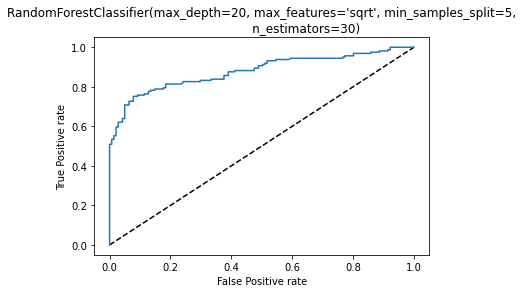

In [111]:
Finalmod=RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=5,n_estimators=30,max_depth=20,criterion='gini')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

##### We got the accuracy of 82% with the CV score of 79% and AUC ROS score of 83%

We will save this as our final model.

In [112]:
import joblib
joblib.dump(Finalmod,'Insurance.obj')

['Insurance.obj']

##### Completed